In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Simple Linear Regression

In [4]:
df = pd.read_csv('Absenteeism_at_work.csv')

In [5]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [6]:
Absenteeism_y = df["Absenteeism time in hours"].to_numpy()
Absenteeism_y.shape

(740,)

In [7]:
Absenteeism_y = Absenteeism_y.reshape((-1,1))
Absenteeism_y.shape

(740, 1)

In [8]:
Absenteeism_X = df['Transportation expense'].to_numpy()
Absenteeism_X = Absenteeism_X.reshape((-1, 1))
Absenteeism_X.shape

(740, 1)

In [9]:
type(Absenteeism_y)

numpy.ndarray

In [10]:
# Split the data into training/testing sets

Absenteeism_X_train = Absenteeism_X[:592]
Absenteeism_X_test = Absenteeism_X[592:]

In [11]:
# Split the targets into training/testing sets

Absenteeism_y_train = Absenteeism_y[:592]
Absenteeism_y_test = Absenteeism_y[592:]

In [12]:
Absenteeism_X_train.shape, Absenteeism_y_train.shape

((592, 1), (592, 1))

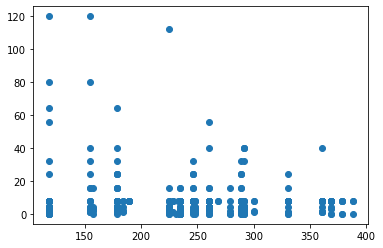

In [13]:
plt.scatter(Absenteeism_X_train, Absenteeism_y_train)
plt.show()

In [14]:
Absenteeism_X_test.shape, Absenteeism_X_train.shape

((148, 1), (592, 1))

In [15]:
# Create linear regression object

regr = linear_model.LinearRegression()

In [18]:
??regr.fit

In [19]:
# Train the model using the training sets

regr.fit(Absenteeism_X_train, Absenteeism_y_train)

LinearRegression()

In [20]:
Absenteeism_y_pred = regr.predict(Absenteeism_X_train)

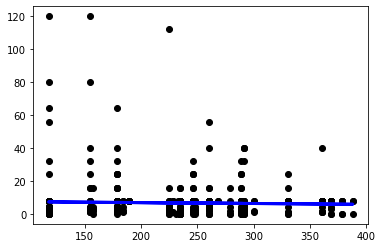

In [21]:
plt.scatter(Absenteeism_X_train,Absenteeism_y_train,  color='black')
plt.plot(Absenteeism_X_train, Absenteeism_y_pred, color='blue', linewidth=3)

plt.show()

In [22]:
# Make predictions using the testing
Absenteeism_y_pred = regr.predict(Absenteeism_X_test)

In [ ]:
# y = ax + b

In [23]:
# The coefficients

print('Coefficients: \n', regr.coef_)

# The intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(Absenteeism_y_test, Absenteeism_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(Absenteeism_y_test, Absenteeism_y_pred))

Coefficients: 
 [[-0.00535292]]
Intercept: 
 [7.93354958]
Mean squared error: 319.14
Coefficient of determination: -0.01


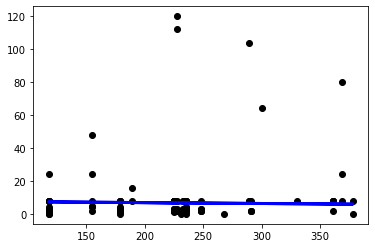

In [25]:
# Plot outputs

plt.scatter(Absenteeism_X_test, Absenteeism_y_test,  color='black')
plt.plot(Absenteeism_X_test, Absenteeism_y_pred, color='blue', linewidth=3)

plt.show()
